# Chapter 2: Two-Sided Tests: Introduction
## 2.1 Two-Sided Tests for Comparing Two Treatments with Normal Response of Known Variance

色々な復習。

平均$\theta$, 分散$1$の正規分布に従う確率変数$Z$の分布に対して、帰無仮説$H_0: \theta=0$ を考え、ある定数$c$について、$|Z|>c$ならば帰無仮説$H_0$を棄却することにする（両側検定を考える）。

第1種の誤り：実は$\theta=0$であるのに、$H_0$を棄却してしまう確率$\alpha$
$$\alpha=\text{Pr}_{\theta=0}\{|Z|>c\}.$$

第2種の誤り：$\theta\neq 0$であるのに、誤って$H_0$を採択してしまう（$H_0$を棄却し損ねる）確率$\beta$。$1-\beta$を検出力という。
$$\text{Pr}_{\theta=\delta}\{|Z|>c\} = \text{Pr}_{\theta=-\delta}\{|Z|>c\} = 1-\beta.$$
上式は
$$\text{Pr}_{\theta=\delta}\{Z>c\} = \text{Pr}_{\theta=-\delta}\{Z<-c\} = 1-\beta.$$
と近似しても差し支えない(とする)。

$\alpha=0.05$ならば$c=1.96$と選ぶ話のグラフ。

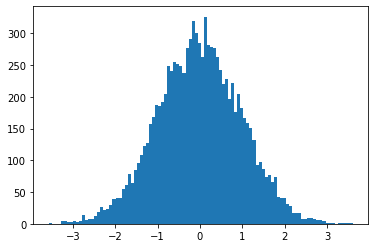

alpha=0.0476 if c=1.96


In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

zs = np.random.normal(size=10000)
plt.hist(zs, bins=100)
plt.show()

print("alpha={} if c=1.96".format(len([z for z in zs if abs(z)>1.96])/len(zs)))

$\delta$と$\beta$の関係。

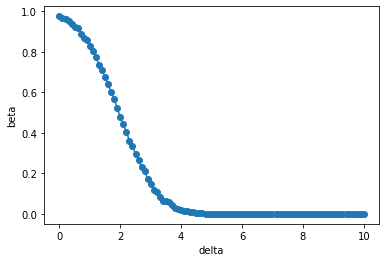

delta=2.8000000000000003 for beta=0.2113


In [24]:
deltas = np.linspace(0,10,101)
betas = []
for delta in deltas:
    zs = np.random.normal(loc=delta, size=10000)
    beta = len([z for z in zs if z<=1.96])/len(zs)
    betas.append(beta)
plt.plot(deltas, betas, 'o-')
plt.xlabel('delta')
plt.ylabel('beta')
plt.show()

d,b=sorted([t for t in zip(deltas,betas)], key=lambda t: abs(t[1]-0.2))[0]
print("delta={} for beta={}".format(d,b))


$\beta=0.2$とするのが標準的とすると、$\delta=2.8$程度。つまり$\theta=\delta\neq 0$であるが、$\delta$がかなり大きくないと誤って$H_0$を採択してしまう。

## 2.2 A Fixed Sample Test

$X_{Ai} \sim \mathcal{N}(\mu_A, \sigma^2), \; X_{Bi}\sim\mathcal{N}(\mu_B,\sigma^2)$ という二つの分布から取られたサンプル$\{X_{Ai}\}, \{X_{Bi}\}$に対して、帰無仮説$H_0: \mu_A=\mu_B$ を棄却することを考える（両側検定）。

\begin{align*}
Z &= \frac1{\sqrt{2n\sigma^2}}\left(\sum_{i=1}^n X_{Ai}-\sum_{i=1}^n X_{Bi}\right)\\
&\sim \mathcal{N}\left((\mu_A-\mu_B)\sqrt{\frac{n}{2\sigma^2}}, 1\right)
\end{align*}

$|Z|>\Phi^{-1}(1-\frac\alpha2)$ であれば帰無仮説$H_0$を棄却する。

検出力については
$$\text{Pr}\{|Z|>\Phi^{-1}(1-\frac\alpha2)\}=1-\beta$$
ただし、$Z\sim\mathcal{N}(\pm \delta\sqrt{n/(2\sigma^2)}, 1), \; \delta=\mu_A-\mu_B.$

ここから、必要なサンプルサイズは
$$n_f(\alpha,\beta,\delta,\sigma^2) = \left(\Phi^{-1}(1-\frac\alpha2)+\Phi(1-\beta)\right)^2\frac{2\sigma^2}{\delta^2}.$$

$\alpha=0.05, \beta=0.1, \delta=1, \sigma^2=4$ とすると$n_f = 84.1$
そして
$$\left|\sum_{i=1}^{85}X_{Ai}-\sum_{i=1}^{85}X_{Bi}\right|\geq 1.96\sqrt{85\times2\times4}=51.1$$
ならば$H_0$を棄却する。

$\alpha=0.05$になってる確認。($\delta=0$で$H_0$が棄却される確率が$0.05$程度)

H0=9519, H1=481, alpha=0.0481


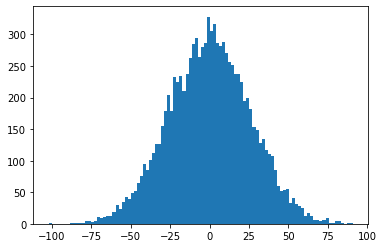

In [23]:
nH0, nH1=0, 0
diffs = []
for trial in range(0,10000):
    xas = np.random.normal(loc=0.0, scale=2, size=85)
    xbs = np.random.normal(loc=0.0, scale=2, size=85)
    diff = sum(xas)-sum(xbs)
    diffs.append(diff)
    if abs(diff)>51.1:
        nH1 += 1
    else:
        nH0 += 1
print("H0={}, H1={}, alpha={}".format(nH0, nH1, nH1/(nH0+nH1)))
plt.hist(diffs, bins=100)
plt.show()

$\beta=0.1$になっている確認。（$\delta=1$で$H_0$が採択される確率が$0.1$程度）

H0=945, H1=9055, beta=0.0945


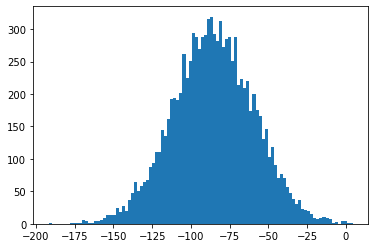

In [22]:
nH0, nH1=0, 0
diffs = []
for trial in range(0,10000):
    xas = np.random.normal(loc=0.0, scale=2, size=85)
    xbs = np.random.normal(loc=1.0, scale=2, size=85)
    diff = sum(xas)-sum(xbs)
    diffs.append(diff)
    if abs(diff)>51.1:
        nH1 += 1
    else:
        nH0 += 1
print("H0={}, H1={}, beta={}".format(nH0, nH1, nH0/(nH0+nH1)))
plt.hist(diffs, bins=100)
plt.show()

## 2.3 Group Sequential Tests

ここまでに述べた普通の検定方法は、必要なサンプルサイズのデータを全部取ることが必要である（＝結果を途中で判断出来ない）。

Group Sequential Test は、データの取得を何回 $k=1, \cdots, K$ に分割して集計して$Z_k$を求め、

* 途中の$k=1,\cdots,K-1$の場合、$|Z_k|>c_k$となったら$H_0$を棄却、$|Z_k|<c_k$なら測定を継続
* 最後の$k=K$の場合、$|Z_k|>c_k$となったら$H_0$を棄却、$|Z_k|<c_k$なら$H_0$を採択

という方法である。

## 2.4 Pocock's Test

[Pocock(1977)](https://www.jstor.org/stable/2335684?seq=1#page_scan_tab_contents)

2.2と同じ問題を考える。（$X_{Ai}\sim\mathcal{N}(\mu_A,\sigma^2), \; X_{Bi}\sim\mathcal{N}(\mu_B,\sigma^2)$ に対して$H_0: \mu_A=\mu_B$）

測定$k=1,\cdots,K$毎に$m$個のサンプルをそれぞれ測定する。
$$Z_k = \frac1{\sqrt{2mk\sigma^2}}\left(\sum_{i=1}^{mk}X_{Ai}-\sum_{i=1}^{mk}X_{Bi}\right)$$
とする。(つまり測定した$1,\cdots,k$の値全部を使って$Z_k$は計算している)

* 群$k=1,\cdots,K-1$に対して
    * もし $|Z_k|\geq C_P(K,\alpha)$ なら $H_0$を棄却して終了
    * さもなければ、群$k+1$の測定
* 群$k=K$に対して
    * もし $|Z_k|\geq C_P(K,\alpha)$ なら $H_0$を棄却して終了
    * さもなければ、$H_0$を採択して停止


### 2.4.3 An Example

Pocock's Test の例。
$\alpha=0.05, \; 1-\beta=0.9, \; \delta=1, \; \sigma^2=4$ という同じ条件で実施する。$K=5$で実施する。

サンプルサイズは Table 2.2 の表の補正$R_p(K,\alpha,\beta)$の値を適用して
$$R_p(K, \alpha, \beta) n_f(\alpha, \beta, \delta, \sigma^2) = 1.207 \times 84.1 = 101.5 \;\Longrightarrow\; \text{各測定は}101.5/5=21\text{回}$$
判定条件は、Table 2.1 の表の補正　$C_P(K,\alpha)$を適用して
$$\left|\sum_{i=1}^{21k}X_{Ai}-\sum_{i=1}^{21k}X_{Bi}\right| \geq  C_P(K,\alpha) \sqrt{2mk\sigma^2} = 2.413 \sqrt{21k \times 2 \times 4} = 31.28\sqrt{k}$$

In [39]:
def pocock_test(delta):
    K=5
    H0, H1 = 0, 0
    ks = []
    for trial in range(10000):
        xas = np.random.normal(loc=0.0, scale=2, size=21*K)
        xbs = np.random.normal(loc=delta, scale=2, size=21*K)
        for i in range(K):
            k = i+1
            diff = sum(xas[:21*k])-sum(xbs[:21*k])
            if abs(diff)>(31.28*np.sqrt(k)):
                H1 += 1
                ks.append(k)
                break
            elif k==K:
                H0 += 1
                ks.append(k)
                break
            else:
                pass
    plt.hist(ks, bins=5, range=(1,5))
    plt.show()
    return (H0,H1)

$\alpha=0.05$になってる確認。($\delta=0$で$H_0$が棄却される確率が$0.05$程度)。

シミュレーションしてみると、そもそも差がないので、$k=5$まで測定を繰り返す。

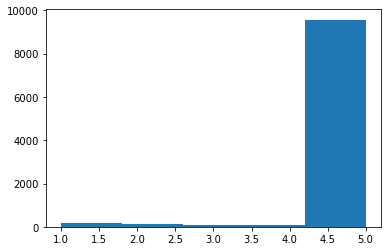

alpha=0.0467


In [40]:
H0, H1 = pocock_test(0)
print("alpha={}".format(H1/(H0+H1)))

$\beta=0.1$になっている確認。（$\delta=1$で$H_0$が採択される確率が$0.1$程度）

差があるので5回全部試さずに途中で検定を中断する可能性が案外高いことがわかる。

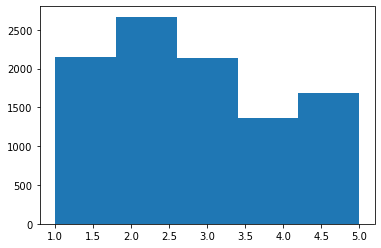

beta=0.091


In [41]:
H0, H1 = pocock_test(1)
print("beta={}".format(H0/(H0+H1)))